# Comparing iModulons

`compare_ica` is a function specifically built to compare the components between different ICA runs. The function will return a Digraph plot which shows connections between ICA components of different runs, as well as Dictionary List of the one-to-one connections.

The function requires a minimum of two inputs if running a comparison beween two ICA runs for the same organism:

* S1: Pandas Dataframe of M matrix 1
* S2: Pandas Dataframe of M Matrix 2

`compare_ica` can be found in **pymodulon.compare**

In [1]:
from pymodulon import example_data
from pymodulon.compare import *

## Comparsion within the same organism

In [2]:
ecoli_data = example_data.load_ecoli_data()

We will create a copy of the *E. coli* M matrix that has slightly different iModulon names.

In [3]:
new_M = ecoli_data.M.copy()
new_M.columns = ['run2_'+str(i) for i in new_M.columns]

For this example, we will only compare the first 5 iModulons.

In [4]:
links,dots = compare_ica(ecoli_data.M.iloc[:,:5],new_M.iloc[:,:5])

The comparison data are stored in ``links``. The first two values in each element of ``links`` are the iModulon name from the first and second datasets respectively. The final value is the Pearson R correlation between the Independent Component gene weights.

In [6]:
links

[('AllR/AraC/FucR', 'run2_AllR/AraC/FucR', 1.0),
 ('ArcA-1', 'run2_ArcA-1', 1.0),
 ('ArcA-2', 'run2_ArcA-2', 1.0),
 ('ArgR', 'run2_ArgR', 1.0),
 ('AtoC', 'run2_AtoC', 1.0)]

The graphical comparison is saved as ``dots``. The thickness of the arrows represents how similar the iModulons in the first dataset are to the dataset in the second dataset. Since we are comparing two copies of the same dataset, all arrows are at maximum thickness.

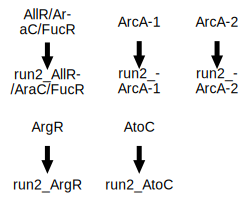

In [7]:
dots

## Comparison across organisms
`compare_ica` can also be used to compare ICA components between different
organisms. To do so, you will need to provide an addition input, which is a
string path to a Bidirectional Best Hit (BBH) orthology between your two organisms of interest.

In [8]:
example_bbh = example_data.load_example_bbh()
example_bbh.head()

,gene,subject,PID,alnLength,mismatchCount,gapOpenCount,queryStart,queryEnd,subjectStart,subjectEnd,eVal,bitScore,gene_length,COV,BBH
3,b0003,USA300HOU_RS06760,26.897,290,183,8,1,279,4,275,2.060000e-25,99.8,310,0.935484,<=>
6,b0007,USA300HOU_RS06905,40.638,470,257,6,1,455,1,463,3.650000e-114,342.0,476,0.987395,<=>
9,b0014,USA300HOU_RS08425,55.818,636,251,4,1,636,1,606,0.000000e+00,678.0,638,0.996865,<=>
10,b0015,USA300HOU_RS08420,46.982,381,187,5,1,371,1,376,8.040000e-110,323.0,376,1.013298,<=>
15,b0023,USA300HOU_RS08455,42.353,85,36,3,1,79,1,78,1.530000e-09,46.6,87,0.977011,<=>


You can also provide a path to your own orthology file, as long as it contains the
columns ``gene`` and ``target``

It is important that the order of the organism matches the order of the orthology
file. Specifically, the organism for the ``M1`` file must be the organism that
fills the ``gene`` column in the orthology file.

In [9]:
staph_data = example_data.load_staph_data()

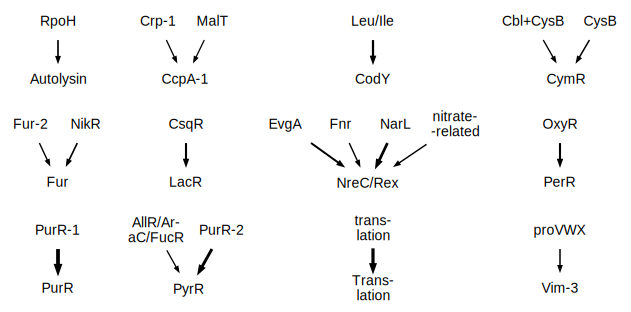

In [10]:
links,dots = compare_ica(ecoli_data.M,staph_data.M,
                         ortho_file = example_bbh)
dots

Here it is much more clear that some iModulons are more similar between species, whereas others are loosely connected. Arrows can also indicate if an iModulon is composed of multiple iModulons from another dataset.

In [11]:
links[:5]

[('AllR/AraC/FucR', 'PyrR', 0.26151978205478876),
 ('Cbl+CysB', 'CymR', 0.2694541420808297),
 ('Crp-1', 'CcpA-1', 0.257653219615526),
 ('CsqR', 'LacR', 0.41725112391151326),
 ('CysB', 'CymR', 0.31057785046755065)]

Additionally, you can adjust the metric type and cutoff values for correlations
by utilizing the ``method`` and ``cutoff`` parameters. The default for ``method`` is
 ``"pearson"``, but can be changed to ``"spearman"`.

``cutoff`` takes a float value between 0 and 1 and will only
show correlations greater than the ``cutoff`` value (default: 0.3).

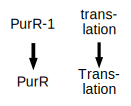

In [12]:
links,dots = compare_ica(ecoli_data.M,staph_data.M,
                         ortho_file = example_bbh,
                         cutoff = 0.6)
dots

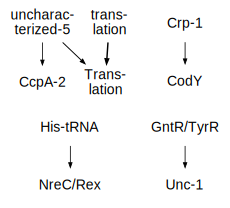

In [13]:
links,dots = compare_ica(ecoli_data.M,staph_data.M,
                         ortho_file = example_bbh,
                         cutoff = 0.15, method = 'spearman')
dots

## Create a BBH orthology file
To create your own BBH orthology file, pymodulon.compare contains a set of functions that will allow you to create the desired bbh.csv file for you specific comparison. This only needs to be done once per comparison.

In order to make the BBH orthology file, you need to obtain the Genbank Full Genome files for your organisms. These can be found at https://www.ncbi.nlm.nih.gov/genome/. Search for both of your organisms/strains and download the "Genbank (full)" file. Once saved into a known location, you can use the ``make_prots`` function to convert the Genbank files into protein FASTA files.

``make_prots`` recieves two parameters:

* ``gbk``: Path to the genbank file (one file per function call)
* ``out_path``: Path to the protein FASTA files

In [13]:
# ecoli_gb= "../pymodulon/test/data/ecoli.gb"
# mtb_gb = "../pymodulon/test/data/mtb.gb"
# ecoli_out = "../pymodulon/test/data/ecoli_prot.fasta"
# mtb_out = "../pymodulon/test/data/mtb_prot.fasta"

# make_prots(ecoli_gb,ecoli_out)
# make_prots(mtb_gb,mtb_out)

### Create Genbank database files
In order to run Bidirectional Best Hits between two organisms, it is required to build the necessary Genbank Database files from the newly created protein FASTA files. In order to do so, use the `make_prots_db` function. You will do this for both organims.

`make_prots_db` recieves one parameter:

* `fasta_file`: String path to protein FASTA file

If there is an error, the function will print out error message. The function will also not execut if the necessary Genbank DB files already exist.

In [14]:
# make_prot_db(ecoli_out)
# make_prot_db(mtb_out)

### Create BBH CSV
Once the previous steps have been completed, you can now create the BBH CSV file. In order to do so, you can use the `get_bbh` function. 

`get_bbh` has the following parameters:

* `db1`: String path to protein FASTA file (output of make_prots function) for organism 1
* `db2`: String path to protein FASTA file (output of make_prots function) for organism 2
* `outdir`: String path to output directory, default is "bbh" and will create the directory if it does not exist
* `outname`: Default db1_vs_db2_parsed.csv where db[1-2] are the passed arguments name of the csv file where that will save the results
* `mincov`: Minimum coverage to call hits in BLAST, must be between 0 and 1
* `evalue`: evalue thershold for BLAST hits, Default .001
* `threads`: Number of threads to run BLAST, Default 1
* `force`: Whether to overwrite existing files or not
* `savefiles`: Whether to save files to outdir

The function will return a Pandas DataFrame containing all the BLAST hits between the two genes. The function will also save the DataFrame to a csv file, which you can then use in `compare_ica` between the two organisms.

In [15]:
# get_bbh(ecoli_out,mtb_out, outdir = "../pymodulon/test/data/")